In [ ]:
from google.colab import files
 
 
uploaded = files.upload()
data = pd.read_csv('sales.csv')

Saving sales.csv to sales (1).csv


In [ ]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans 
import plotly.express as px
import seaborn as sb


In [35]:
data = pd.read_csv('sales.csv')
data_visual = pd. read_csv('sales.csv')

In [36]:
data_visual

,Date,Product,City,Price,Quantity
0,01-06-2021,TV,Mumbai,699.99,10
1,01-06-2021,TV,Delhi,799.99,15
2,01-06-2021,TV,Bangalore,749.99,20
3,01-06-2021,TV,Baroda,799.99,25
4,01-06-2021,Laptop,Mumbai,849.99,12
...,...,...,...,...,...
59,04-06-2021,Mobile,Baroda,699.99,15
60,04-06-2021,Tablet,Mumbai,499.99,18
61,04-06-2021,Tablet,Delhi,549.99,10
62,04-06-2021,Tablet,Bangalore,399.99,20


In [50]:
data.columns

Index(['Date', 'Product', 'City', 'Price', 'Quantity'], dtype='object')

In [48]:
data.describe()

,Price,Quantity
count,64.000000,64.00000
mean,707.787031,14.37500
std,178.907894,5.51621
min,399.990000,6.00000
25%,549.990000,10.00000
50%,699.990000,13.50000
75%,849.990000,18.00000
max,999.990000,29.00000


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      64 non-null     object 
 1   Product   64 non-null     object 
 2   City      64 non-null     object 
 3   Price     64 non-null     float64
 4   Quantity  64 non-null     int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 2.6+ KB


In [44]:
df = data.drop_duplicates()

In [46]:
df.isnull().sum()

Date        0
Product     0
City        0
Price       0
Quantity    0
dtype: int64

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

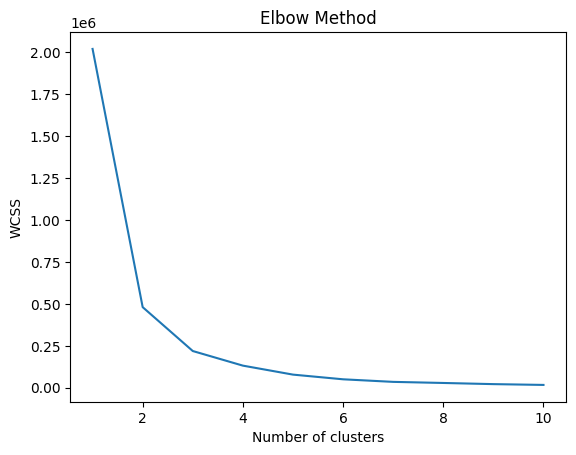

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# load data
data = pd.read_csv("sales.csv")

# select features for clustering
X = data.iloc[:, 3:5].values

# choose the optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.show()

# fit k-means algorithm to the dataset
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


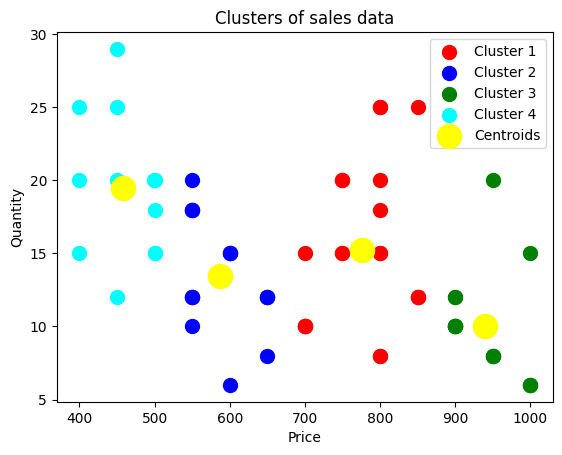

In [ ]:
# visualize the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of sales data')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.legend()
plt.show()


In [ ]:
wcss

[2018423.1835359382,
 480325.04033157375,
 218948.7403276629,
 131973.98354404763,
 78451.40814722223,
 50524.89716237373,
 35221.21953175713,
 28702.939381818178,
 21797.623690389613,
 17052.31146095238]

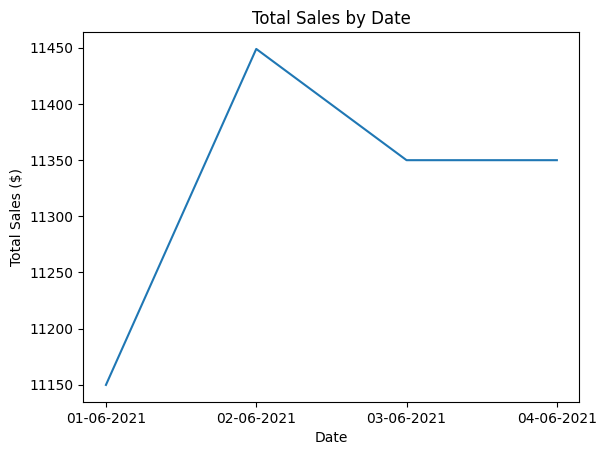

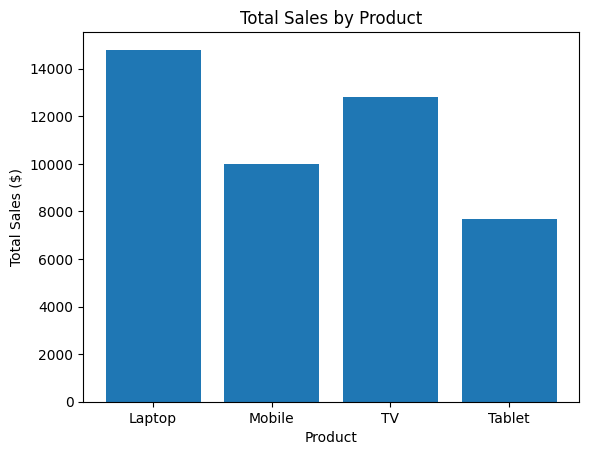

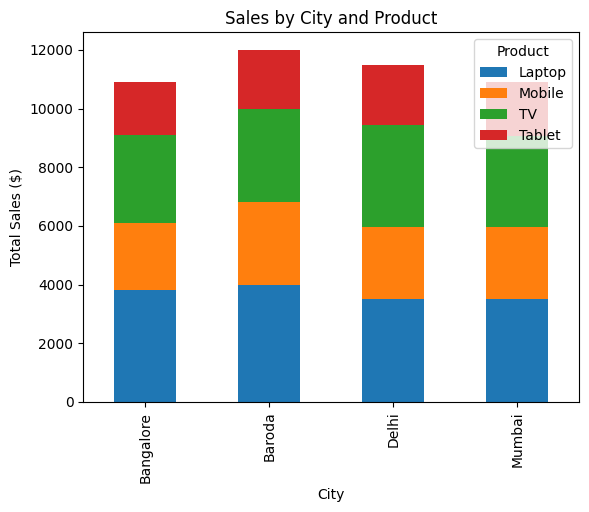

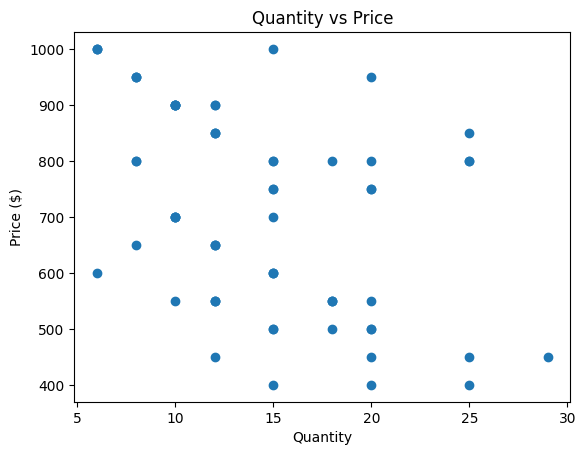

In [30]:


# Line chart for total sales by date
sales_by_date = sales_df.groupby('Date')['Price'].sum()
plt.plot(sales_by_date.index, sales_by_date.values)
plt.title('Total Sales by Date')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.show()

# Bar chart for total sales by product
sales_by_product = sales_df.groupby('Product')['Price'].sum()
plt.bar(sales_by_product.index, sales_by_product.values)
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.show()

# Stacked bar chart for sales by city and product
sales_by_city_product = sales_df.groupby(['City', 'Product'])['Price'].sum().unstack()
sales_by_city_product.plot(kind='bar', stacked=True)
plt.title('Sales by City and Product')
plt.xlabel('City')
plt.ylabel('Total Sales ($)')
plt.show()

# Scatter plot for quantity and price
plt.scatter(sales_df['Quantity'], sales_df['Price'])
plt.title('Quantity vs Price')
plt.xlabel('Quantity')
plt.ylabel('Price ($)')
plt.show()



In [29]:
# 3D Scatter Plot
fig2 = px.scatter_3d(df, x='Price', y='Quantity', z='City', color='Product', title='3D Scatter Plot')
fig2.show()

# Pie Chart
fig3 = px.pie(df, values='Quantity', names='Product', title='Pie Chart')
fig3.show()

In [25]:
import pandas as pd
import plotly.express as px

# Read data from CSV file
df = pd.read_csv('sales.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Create a time series plot
fig = px.line(df, x='Date', y='Quantity', color='Product', title='Sales Time Series')
fig.update_xaxes(title_text='Date', showgrid=False)
fig.update_yaxes(title_text='Sales', showgrid=False)
fig.show()
